<a href="https://colab.research.google.com/github/Harshida9169/DM-1-Programming-Assignment1/blob/main/Kokkinti_DM_Programming_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import nan

import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv(r'Grocery_Items_31.csv').values
data

array([['hard cheese', 'cream cheese ', nan, ..., nan, nan, nan],
       ['beef', 'salt', nan, ..., nan, nan, nan],
       ['canned beer', 'root vegetables', nan, ..., nan, nan, nan],
       ...,
       ['root vegetables', 'pastry', nan, ..., nan, nan, nan],
       ['meat', 'domestic eggs', nan, ..., nan, nan, nan],
       ['specialty fat', 'red/blush wine', nan, ..., nan, nan, nan]],
      dtype=object)

In [3]:
data=data.tolist()

In [4]:
new=[]
for i in range(len(data)):
    new_list = [item for item in data[i] if not(pd.isnull(item)) == True]
    new.append(new_list)

In [5]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(new).transform(new)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
7996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)


In [7]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.126875,0.1535,0.014750,0.116256,0.757369,-0.004725,0.957857,-0.268424
1,(rolls/buns),(whole milk),0.111000,0.1535,0.015125,0.136261,0.887696,-0.001914,0.980042,-0.124580
2,(soda),(whole milk),0.094125,0.1535,0.010375,0.110226,0.718083,-0.004073,0.951365,-0.302353
3,(yogurt),(whole milk),0.086500,0.1535,0.011000,0.127168,0.828454,-0.002278,0.969831,-0.184789


In [8]:
### (d)

In [9]:
msv=[0.001, 0.005, 0.01]
mct=[0.05, 0.075, 0.1]
sv=[]
ct=[]
count=[]
def d(msv,mct):
    for i in range(len(msv)):
        frequent_itemsets = apriori(df, min_support=msv[i], use_colnames=True)
        for j in range(len(mct)):
            ar=association_rules(frequent_itemsets, metric="confidence", min_threshold=mct[j])
            sv.append(msv[i])
            ct.append(mct[j])
            count.append(len(ar))
    return count,sv,ct


In [10]:
count,s,t=d(msv,mct)

In [11]:
df3=pd.DataFrame(columns=["msv","mct","results"])
df3.mct = t
df3.msv = s
df3.results=count

In [12]:
df3

,msv,mct,results
0,0.001,0.050,510
1,0.001,0.075,283
2,0.001,0.100,153
3,0.005,0.050,65
4,0.005,0.075,46
5,0.005,0.100,25
6,0.010,0.050,10
7,0.010,0.075,8
8,0.010,0.100,4


<Axes: xlabel='msv', ylabel='mct'>

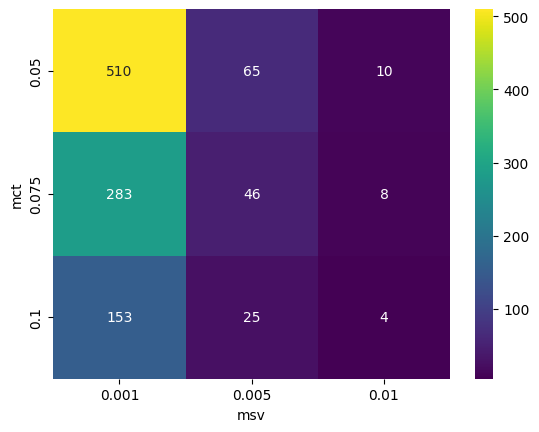

In [13]:
pivot_table = df3.pivot(index='mct', columns='msv', values='results')

# Create a heatmap from the pivot table
sns.heatmap(pivot_table, annot=True, cmap="viridis",fmt='d')

In [14]:
subset1 = df.iloc[:len(df)//2]
subset2 = df.iloc[len(df)//2:]

def extract_association_rules(subset):
    frequent_itemsets = apriori(subset, min_support=0.005, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.075)
    return rules

In [15]:
rules_subset1 = extract_association_rules(subset1)
print("Association Rules for Subset 1:")
print(rules_subset1)


Association Rules for Subset 1:
             antecedents         consequents  antecedent support  \
0         (bottled beer)  (other vegetables)             0.04750   
1         (bottled beer)        (whole milk)             0.04750   
2        (bottled water)        (rolls/buns)             0.06225   
3        (bottled water)              (soda)             0.06225   
4        (bottled water)        (whole milk)             0.06225   
5          (brown bread)        (whole milk)             0.04300   
6          (canned beer)        (whole milk)             0.05100   
7          (canned beer)            (yogurt)             0.05100   
8         (citrus fruit)  (other vegetables)             0.05675   
9         (citrus fruit)        (whole milk)             0.05675   
10              (yogurt)      (citrus fruit)             0.08525   
11        (citrus fruit)            (yogurt)             0.05675   
12       (domestic eggs)        (whole milk)             0.03900   
13         (fran

In [16]:
rules_subset2 = extract_association_rules(subset2)
print("\nAssociation Rules for Subset 2:")
print(rules_subset2)


Association Rules for Subset 2:
                antecedents         consequents  antecedent support  \
0                    (beef)        (whole milk)             0.03475   
1            (bottled beer)        (whole milk)             0.04250   
2           (bottled water)  (other vegetables)             0.05525   
3           (bottled water)        (whole milk)             0.05525   
4             (canned beer)        (rolls/buns)             0.04825   
5             (canned beer)        (whole milk)             0.04825   
6            (citrus fruit)        (rolls/buns)             0.05750   
7            (citrus fruit)        (whole milk)             0.05750   
8            (citrus fruit)            (yogurt)             0.05750   
9             (frankfurter)  (other vegetables)             0.03875   
10            (frankfurter)        (whole milk)             0.03875   
11  (fruit/vegetable juice)        (whole milk)             0.03300   
12             (newspapers)        (whole mi

In [17]:
common_rules = pd.merge(rules_subset1, rules_subset2, on=['antecedents', 'consequents'])
if not common_rules.empty:
    print("\nCommon Association Rules:")
    print(common_rules)
else:
    print("\nNo common association rules found.")


Common Association Rules:
           antecedents         consequents  antecedent support_x  \
0       (bottled beer)        (whole milk)               0.04750   
1      (bottled water)        (whole milk)               0.06225   
2        (canned beer)        (whole milk)               0.05100   
3       (citrus fruit)        (whole milk)               0.05675   
4       (citrus fruit)            (yogurt)               0.05675   
5        (frankfurter)  (other vegetables)               0.03625   
6         (newspapers)        (whole milk)               0.03475   
7         (rolls/buns)  (other vegetables)               0.10825   
8   (other vegetables)        (rolls/buns)               0.12600   
9            (sausage)  (other vegetables)               0.05775   
10     (shopping bags)  (other vegetables)               0.04575   
11              (soda)  (other vegetables)               0.08975   
12        (whole milk)  (other vegetables)               0.15600   
13  (other vegetables

In [18]:
#part2 # Banner ID : 916471588

In [19]:
import cv2
import os
from glob import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential

In [20]:
def load_images_and_labels(root_folder):
    image_paths = []
    labels = []
    classes = sorted(os.listdir(root_folder))
    for class_index, class_name in enumerate(classes):
        class_folder = os.path.join(root_folder, class_name)
        image_files = glob(os.path.join(class_folder, '*.jpg'))
        image_paths.extend(image_files)
        labels.extend([class_name] * len(image_files))
    return image_paths, labels

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
images_folder = r'/content/drive/MyDrive/cropped'

In [26]:
image_paths, labels = load_images_and_labels(images_folder)

In [27]:
CNN = Sequential([
Conv2D(filters=8,kernel_size=3,activation='relu',input_shape = (256,256,3)),
MaxPooling2D(pool_size=2) ,
Flatten(),
Dense(16,activation='relu'),
Dense(4,activation = 'softmax')
])
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 8)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 129032)            0         
                                                                 
 dense (Dense)               (None, 16)                2064528   
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 2064820 (7.88 MB)
Trainable params: 2064820 (7.88 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
image_paths, labels = load_images_and_labels(images_folder)


In [30]:
df = pd.DataFrame({'filename': image_paths, 'label': labels})


In [32]:
train_df, validation_df = train_test_split(df, test_size=0.2, random_state=42)


In [33]:
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True
)

In [34]:
train_generator = train_datagen.flow_from_dataframe(
dataframe=train_df,
x_col='filename',
y_col='label',
target_size=(256, 256),
batch_size=16,
class_mode='categorical'
)

Found 600 validated image filenames belonging to 4 classes.


In [35]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
dataframe=validation_df,
x_col='filename',
y_col='label',
target_size=(256,256),
batch_size=16,
class_mode='categorical'
)

Found 151 validated image filenames belonging to 4 classes.


In [36]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


Epoch 1/20
38/38 [==============================] - 154s 4s/step - loss: 3.5061 - accuracy: 0.2433 - val_loss: 1.3863 - val_accuracy: 0.2185
Epoch 2/20
38/38 [==============================] - 25s 658ms/step - loss: 1.3859 - accuracy: 0.2667 - val_loss: 1.3862 - val_accuracy: 0.2185
Epoch 3/20
38/38 [==============================] - 24s 637ms/step - loss: 1.3856 - accuracy: 0.2667 - val_loss: 1.3861 - val_accuracy: 0.2185
Epoch 4/20
38/38 [==============================] - 24s 631ms/step - loss: 1.3854 - accuracy: 0.2667 - val_loss: 1.3859 - val_accuracy: 0.2185
Epoch 5/20
38/38 [==============================] - 24s 629ms/step - loss: 1.3852 - accuracy: 0.2417 - val_loss: 1.3857 - val_accuracy: 0.2980
Epoch 6/20
38/38 [==============================] - 23s 602ms/step - loss: 1.3850 - accuracy: 0.2517 - val_loss: 1.3858 - val_accuracy: 0.2185
Epoch 7/20
38/38 [==============================] - 26s 663ms/step - loss: 1.3849 - accuracy: 0.2650 - val_loss: 1.3861 - val_accuracy: 0.2185
E

Text(0.5, 1.0, 'Accuracy')

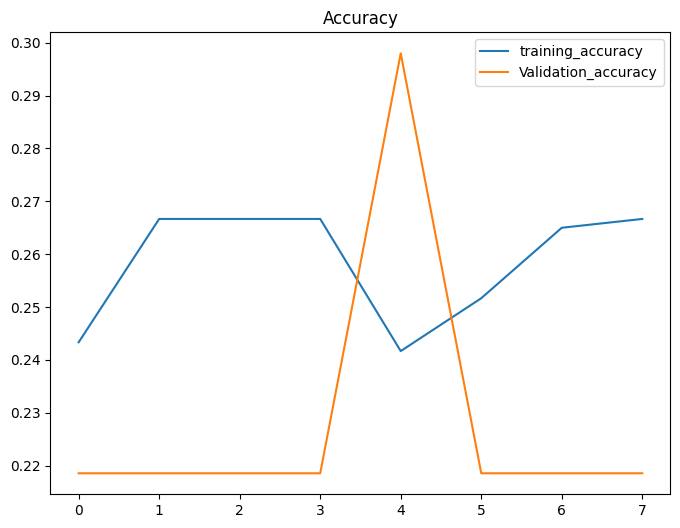

In [37]:
CNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = CNN.fit(
train_generator,
steps_per_epoch=len(train_generator),
epochs=20,
validation_data=val_generator,
validation_steps=len(val_generator),
callbacks=[early_stopping]
)
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.legend()
plt.title('Accuracy')

In [38]:
CNN8 = Sequential([
Conv2D(filters=8,kernel_size=3,activation='relu',input_shape = (256,256,3)),
MaxPooling2D(pool_size=2) ,
Flatten(),
Dense(8,activation='relu'),
Dense(4,activation = 'softmax')
])
CNN8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 8)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 129032)            0         
                                                                 
 dense_2 (Dense)             (None, 8)                 1032264   
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1032524 (3.94 MB)
Trainable params: 1032524 (3.94 MB)
Non-trainable params: 0 (0.00 Byte)
________________

Epoch 1/20
38/38 [==============================] - 27s 672ms/step - loss: 1.6422 - accuracy: 0.2883 - val_loss: 1.3212 - val_accuracy: 0.3576
Epoch 2/20
38/38 [==============================] - 25s 657ms/step - loss: 1.3360 - accuracy: 0.3517 - val_loss: 1.3297 - val_accuracy: 0.3841
Epoch 3/20
38/38 [==============================] - 24s 618ms/step - loss: 1.3273 - accuracy: 0.3683 - val_loss: 1.2953 - val_accuracy: 0.3841
Epoch 4/20
38/38 [==============================] - 24s 619ms/step - loss: 1.3385 - accuracy: 0.3517 - val_loss: 1.3622 - val_accuracy: 0.3046
Epoch 5/20
38/38 [==============================] - 24s 630ms/step - loss: 1.3139 - accuracy: 0.3683 - val_loss: 1.2864 - val_accuracy: 0.4371
Epoch 6/20
38/38 [==============================] - 25s 661ms/step - loss: 1.3059 - accuracy: 0.3800 - val_loss: 1.2950 - val_accuracy: 0.3775
Epoch 7/20
38/38 [==============================] - 24s 632ms/step - loss: 1.2939 - accuracy: 0.3783 - val_loss: 1.3191 - val_accuracy: 0.3907

Text(0.5, 1.0, 'Accuracy')

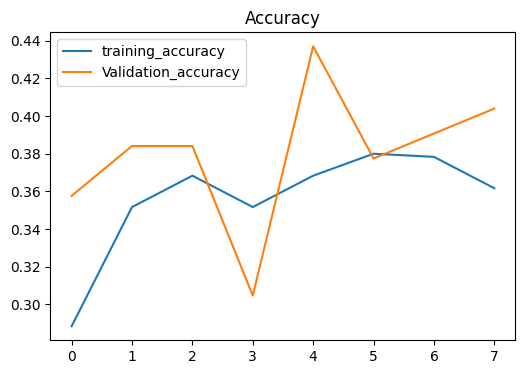

In [39]:
CNN8.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = CNN8.fit(
train_generator,
steps_per_epoch=len(train_generator),
epochs=20,
validation_data=val_generator,
validation_steps=len(val_generator),
callbacks=[early_stopping]
)
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.legend()
plt.title('Accuracy')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 8)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 129032)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                4129056   
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4129412 (15.75 MB)
Trainable params: 4129412 (15.75 MB)
Non-trainable params: 0 (0.00 Byte)
______________

Text(0.5, 1.0, 'Accuracy')

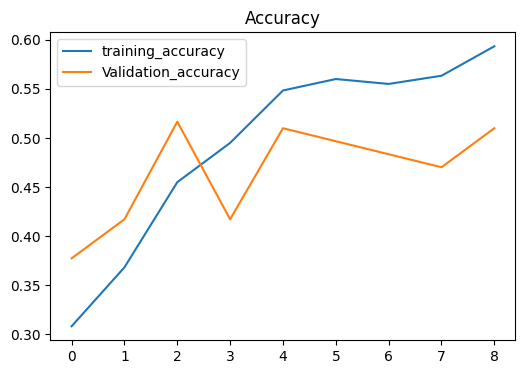

In [40]:
CNN32 = Sequential([
Conv2D(filters=8,kernel_size=3,activation='relu',input_shape = (256,256,3)),
MaxPooling2D(pool_size=2) ,
Flatten(),
Dense(32,activation='relu'),
Dense(4,activation = 'softmax')
])
CNN32.summary()
CNN32.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = CNN32.fit(
train_generator,
steps_per_epoch=len(train_generator),
epochs=20,
validation_data=val_generator,
validation_steps=len(val_generator),
callbacks=[early_stopping]
)
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.legend()
plt.title('Accuracy')

model cnn32 overfits and comparing to other 2 models they are neither overfitting nor underfitting  